In [4]:
import pandas as pd
from sklearn import model_selection
from sklearn import ensemble
from sklearn import pipeline

from feature_engine import imputation

import scikitplot as skplt

In [ ]:
# Leitura do dataset
df = pd.read_csv("C:/Users/lagma/Desktop/projetos/machine-learning/data/dados_pontos.csv", sep=";")
df


,dtRef,idCustomer,Name,qtdeRecencia,freqDias,freqTransacoes,qtdListaPresença,qtdChatMessage,qtdTrocaPontos,qtdResgatarPonei,...,pctListaPresença,pctChatMessage,pctTrocaPontos,pctResgatarPonei,pctPresençaStreak,qtdePontosGanhos,qtdePontosGastos,qtdePontosSaldo,avgRecorrencia,flActive
0,2024-03-31,000ff655-fa9f-4baa-a108-47f581ec52a1,cajuuh,2.0,11,188,10,175,1,1,...,0.053191,0.930851,0.005319,0.005319,0.005319,1275,-1000,275,2.500000,1
1,2024-04-05,000ff655-fa9f-4baa-a108-47f581ec52a1,cajuuh,1.0,12,192,12,177,1,1,...,0.062500,0.921875,0.005208,0.005208,0.005208,1377,-1000,377,1.454545,1
2,2024-03-03,0097ab76-4637-4ece-8ebc-ab6abd61d662,losmundissas,24.0,1,1,1,0,0,0,...,1.000000,0.000000,0.000000,0.000000,0.000000,50,0,50,NaN,0
3,2024-03-08,0097ab76-4637-4ece-8ebc-ab6abd61d662,losmundissas,29.0,1,1,1,0,0,0,...,1.000000,0.000000,0.000000,0.000000,0.000000,50,0,50,NaN,0
4,2024-04-18,00a6d4c8-38e5-4e92-981e-4e4ac5084546,cecisssssss,1.0,3,5,3,2,0,0,...,0.600000,0.400000,0.000000,0.000000,0.000000,152,0,152,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,2024-03-21,fe59fd95-d131-4d50-bb6e-10cdfa7d5f47,comunista_tropical,13.0,7,84,6,78,0,0,...,0.071429,0.928571,0.000000,0.000000,0.000000,378,0,378,2.333333,0
2231,2024-04-06,feb1a34d-202a-4224-a1b3-0e737b12dd4d,mmenoli,1.0,8,12,8,4,0,0,...,0.666667,0.333333,0.000000,0.000000,0.000000,404,0,404,2.142857,1
2232,2024-04-25,feb1a34d-202a-4224-a1b3-0e737b12dd4d,mmenoli,1.0,15,35,14,20,0,1,...,0.400000,0.571429,0.000000,0.028571,0.000000,1220,0,1220,1.571429,1
2233,2024-03-01,fecbdf63-3bf4-44e5-8b1a-0acc9d963603,cianaglima,24.0,2,13,2,11,0,0,...,0.153846,0.846154,0.000000,0.000000,0.000000,111,0,111,1.000000,0


In [6]:
features = df.columns[3:-1]
target = "flActive"

In [ ]:
# Divisão dos dados em treino e teste: 
# treino (80%) e teste (20% )  --> test_size=0.2,

X_train, X_test, y_train, y_test = model_selection.train_test_split(df[features],
                                                                    df[target],
                                                                    random_state=42,
                                                                    test_size=0.2,
                                                                    stratify=df[target],)

print("Tx. resposta Train:", y_train.mean())
print("Tx. resposta Test:", y_test.mean())

# Verificação de valores ausentes:
X_train.isna().sum()


Tx. resposta Train: 0.32550335570469796
Tx. resposta Test: 0.32662192393736017


qtdeRecencia           0
freqDias               0
freqTransacoes         0
qtdListaPresença       0
qtdChatMessage         0
qtdTrocaPontos         0
qtdResgatarPonei       0
qtdPresençaStreak      0
pctListaPresença       0
pctChatMessage         0
pctTrocaPontos         0
pctResgatarPonei       0
pctPresençaStreak      0
qtdePontosGanhos       0
qtdePontosGastos       0
qtdePontosSaldo        0
avgRecorrencia       810
dtype: int64

In [ ]:
imput_max = imputation.ArbitraryNumberImputer(arbitrary_number=999,
                                              variables=['avgRecorrencia'])

# Esta a criar o modelo de aprendijagem supervisionado para prever a variável alvo (target).
clf = ensemble.RandomForestClassifier(random_state=42)

#Definição de parâmetros para busca em grid
params = {
    "n_estimators": [200,300,400,500],
    "min_samples_leaf":[10,20,50,100]
          }

grid = model_selection.GridSearchCV(clf,
                                    param_grid=params,
                                    scoring='roc_auc',
                                    n_jobs=-1)

# Criação do pipeline:
model = pipeline.Pipeline([
    ('imput', imput_max),
    ('model', grid)
])

# Treino do modelo:
model.fit(X_train, y_train)

Pipeline(steps=[('imput', ArbitraryNumberImputer(variables=['avgRecorrencia'])),
                ('model',
                 GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              n_jobs=-1,
                              param_grid={'min_samples_leaf': [10, 20, 50, 100],
                                          'n_estimators': [200, 300, 400, 500]},
                              scoring='roc_auc'))])

In [ ]:
#  Previsão das probabilidades de classe para os dados de teste:
y_test_proba = model.predict_proba(X_test)
y_test_proba

array([[0.37281797, 0.62718203],
       [0.77822833, 0.22177167],
       [0.92272665, 0.07727335],
       [0.65415942, 0.34584058],
       [0.85537271, 0.14462729],
       [0.93282919, 0.06717081],
       [0.95708451, 0.04291549],
       [0.72241952, 0.27758048],
       [0.84190714, 0.15809286],
       [0.81005858, 0.18994142],
       [0.95459215, 0.04540785],
       [0.34120607, 0.65879393],
       [0.9394688 , 0.0605312 ],
       [0.92071203, 0.07928797],
       [0.19403141, 0.80596859],
       [0.63208527, 0.36791473],
       [0.65329396, 0.34670604],
       [0.08212753, 0.91787247],
       [0.62583258, 0.37416742],
       [0.41757036, 0.58242964],
       [0.51333262, 0.48666738],
       [0.81834532, 0.18165468],
       [0.72898996, 0.27101004],
       [0.7084482 , 0.2915518 ],
       [0.79284502, 0.20715498],
       [0.94748387, 0.05251613],
       [0.56265569, 0.43734431],
       [0.69046835, 0.30953165],
       [0.58309484, 0.41690516],
       [0.11926455, 0.88073545],
       [0.

In [ ]:
# Criação de um DataFrame com as previsões do modelo:
df = pd.DataFrame({
    "flActive": y_test,
    "proba_modelo":y_test_proba[:,1]
})

df.to_excel("../data/dados_ks.xlsx", index=False)

<Axes: title={'center': 'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

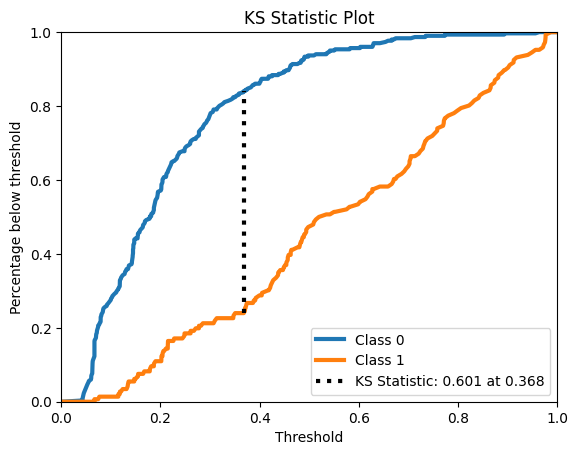

In [11]:
skplt.metrics.plot_ks_statistic(y_test, y_test_proba)